In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
def charger_data(data_path):
    data = pd.read_csv(data_path, sep=';')
    X = np.array(data.loc[ : , data.columns != 'Status'])
    Y = np.array(data['Status'])
    return X,Y,data.columns

In [3]:
data_path = 'credit_scoring.csv'
X,Y,columns =  charger_data(data_path)

In [4]:
X.shape

(4375, 13)

In [5]:
Y.shape

(4375,)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [7]:
#Découper les données en 2, pour l'entrainnement, la validation et le test
def decouper_train_test(data_path, test_size=0.5, normalize=0):
    # charger les données
    X, y, columns = charger_data(data_path)
    
    if(normalize):
        transformer = Normalizer().fit(X)  # fit does nothing.
        transformer.transform(X)

    #decoupage en 2 pour l'entrainnement, la validation et le test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
    
    return X_train, y_train, X_test, y_test

In [8]:
X_train, y_train, X_test, y_test = decouper_train_test(data_path)
print('train', X_train.shape, y_train.shape, 'test', X_test.shape, y_test.shape)


train (2187, 13) (2187,) test (2188, 13) (2188,)


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
tree = DecisionTreeClassifier(random_state=1)
digit_tree=tree.fit(X_train, y_train)

# Estimation de l’erreur de prévision
1-digit_tree.score(X_test,y_test)

0.2728519195612431

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
data = pd.read_csv(data_path, sep=';')
X = data.iloc[:, 1:].values
SC = StandardScaler()
SC.fit(X)
Xnorm = SC.transform(X)
pca=PCA(n_components =12)
pca.fit(Xnorm)
X_pca = pca.transform(Xnorm)

In [13]:
import matplotlib
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

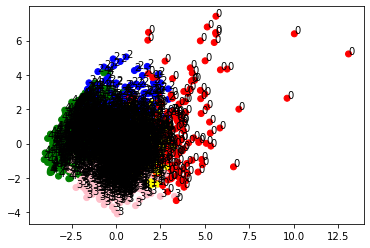

In [14]:
 


n_clusters = 5

clustering = KMeans(n_clusters, random_state=0).fit(Xnorm)
y_kmeans = clustering.predict(Xnorm)
colors = ['red','yellow','blue','pink', 'green']
labels = clustering.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c= y_kmeans, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [15]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

In [16]:
#MultilayerPerceptron à deux couches de tailles respectives 40 et 20 et random_state=1
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(40, 20), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(40, 20), random_state=1,
              solver='lbfgs')

In [17]:
   
    

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#Découper les données en 2, pour l'entrainnement, la validation et le test
def prepare_data(data_path, test_size=0.5):
    # charger les données
    X, y, columns = charger_data(data_path)

    #decoupage en 2 pour l'entrainnement, la validation et le test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
    
    return X_train, y_train, X_test, y_test, columns

def log_result(Y_test, Y_pred, algoType, note):
    print("--- ", algoType, " ---" )
    m_confusion = confusion_matrix(Y_test, Y_pred )
    print("Matrice de confusion", algoType, note)
    print(m_confusion)
    acc = round(100*accuracy_score(Y_test, Y_pred), 2)
    prec = round(100*precision_score(Y_test, Y_pred), 2)
    print(algoType, note, ' : Accuracy  ', acc , 'Precision' , prec)

# Fonction qui applique les 3 alos différents    
def apply_classifier(X_train, _train, X_test, Y_test, note):
    print("apply_classifier begin")
    # Arbre de décision
    DT = DecisionTreeClassifier(criterion = 'gini', random_state=1)
    DT.fit(X_train, y_train)
    Y_pred = DT.predict(X_test)
    #disp = plot_confusion_matrix(DT, X_test, y_test, cmap=plt.cm.Blues)
    #disp.ax_.set_title('arbre de décision')
    log_result(Y_test, Y_pred, 'arbre de décision', note)
    
    # K plus prohces voisins
    KNN = KNeighborsClassifier(n_neighbors=5)
    KNN.fit(X_train, y_train)
    Y_pred = KNN.predict(X_test)
    log_result(Y_test, Y_pred, 'K plus proches voisins', note)

    #MultilayerPerceptron à deux couches de tailles respectives 40 et 20 et random_state=1
    MLP = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(40, 20), random_state=1)
    MLP.fit(X_train, y_train)
    Y_pred = MLP.predict(X_test)
    log_result(Y_test, Y_pred, 'Perceptron multi couches', note)
    



In [18]:

# Sans normalisation

X_train, y_train, X_test, y_test, columns = prepare_data(data_path, test_size=0.5)
print('train', X_train.shape, y_train.shape, 'test', X_test.shape, y_test.shape)

apply_classifier(X_train, y_train, X_test, y_test, 'sans normalisation')





train (2187, 13) (2187,) test (2188, 13) (2188,)
apply_classifier begin
---  arbre de décision  ---
Matrice de confusion arbre de décision sans normalisation
[[ 325  279]
 [ 318 1266]]
arbre de décision sans normalisation  : Accuracy   72.71 Precision 81.94
---  K plus proches voisins  ---
Matrice de confusion K plus proches voisins sans normalisation
[[ 189  415]
 [ 187 1397]]
K plus proches voisins sans normalisation  : Accuracy   72.49 Precision 77.1
---  Perceptron multi couches  ---
Matrice de confusion Perceptron multi couches sans normalisation
[[ 310  294]
 [ 344 1240]]
Perceptron multi couches sans normalisation  : Accuracy   70.84 Precision 80.83


In [19]:

# avec normalisation
print("########## Apres normalisation")

SC = StandardScaler()
SC.fit(X_train)
X_train_norm = SC.transform(X_train)
X_test_norm = SC.transform(X_test)

apply_classifier(X_train_norm, y_train, X_test_norm, y_test, 'avec normalisation')



########## Apres normalisation
apply_classifier begin
---  arbre de décision  ---
Matrice de confusion arbre de décision avec normalisation
[[ 322  282]
 [ 315 1269]]
arbre de décision avec normalisation  : Accuracy   72.71 Precision 81.82
---  K plus proches voisins  ---
Matrice de confusion K plus proches voisins avec normalisation
[[ 286  318]
 [ 223 1361]]
K plus proches voisins avec normalisation  : Accuracy   75.27 Precision 81.06
---  Perceptron multi couches  ---
Matrice de confusion Perceptron multi couches avec normalisation
[[ 345  259]
 [ 222 1362]]
Perceptron multi couches avec normalisation  : Accuracy   78.02 Precision 84.02


In [20]:

# avec normalisation et ACP
print("########## Apres ACP")

pca=PCA(n_components =3)
pca.fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_train_pca = np.concatenate((X_train_norm, X_train_pca), axis=1)

X_test_pca = pca.transform(X_test_norm)
X_test_pca = np.concatenate((X_test_norm, X_test_pca), axis=1)

# dans evplutionPLot, ajouter le param sorded_idx
apply_classifier(X_train_pca, y_train, X_test_pca, y_test, 'avec ACP')



########## Apres ACP
apply_classifier begin
---  arbre de décision  ---
Matrice de confusion arbre de décision avec ACP
[[ 351  253]
 [ 324 1260]]
arbre de décision avec ACP  : Accuracy   73.63 Precision 83.28
---  K plus proches voisins  ---
Matrice de confusion K plus proches voisins avec ACP
[[ 283  321]
 [ 212 1372]]
K plus proches voisins avec ACP  : Accuracy   75.64 Precision 81.04
---  Perceptron multi couches  ---
Matrice de confusion Perceptron multi couches avec ACP
[[ 323  281]
 [ 211 1373]]
Perceptron multi couches avec ACP  : Accuracy   77.51 Precision 83.01


features Index(['Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records', 'Job',
       'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')
Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


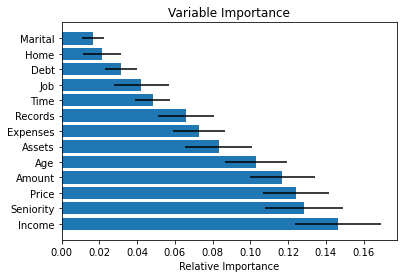

In [21]:
from sklearn.ensemble import RandomForestClassifier
features = columns[:13]
print("features", features)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_norm, y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
print(features[sorted_idx])
padding = np.arange(X_train_norm.size/len(X_train_norm)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()